# covid project analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data exploring

In [2]:
df = pd.read_csv("covid-19.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa




● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies.


In [3]:
# last entries of the dataset
df.tail()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [4]:
# checking the shape of the dataset
df.shape

(49068, 10)

In [5]:
#checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
recorded_confirmed = df['Confirmed'].sum()
recorded_confirmed

828508482

In [7]:
recoeded_death = df['Deaths'].sum()
recoeded_death

43384903

In [8]:
active_cases = df['Active'].sum()
active_cases

396715350

In [9]:
recovered_cases = df['Recovered'].sum()
recovered_cases

388408229

# data preprocessing

In [10]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# checking null values
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [12]:
# removing the column because contains very large amount of the data
df.drop(columns=['Province/State'],inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Filter data for India
india_data = df[df['Country/Region'] == 'India']

In [15]:
india_data.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


# visualisation

In [16]:
# Prepare data for visualization
india_trends = india_data[['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']].melt(
    id_vars='Date',
    value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
    var_name='Category',
    value_name='Count'
)

## comparing plot trend in india and on global condition

In [17]:

import plotly.express as px
from prophet import Prophet

# Plot trends for India
fig = px.line(
    india_trends,
    x='Date',
    y='Count',
    color='Category',
    title='COVID-19 Trends in India',
    labels={'Count': 'Number of Cases', 'Date': 'Date'},
    template='plotly_dark'
)
fig.update_layout(legend_title_text='Case Type', xaxis_title='Date', yaxis_title='Number of Cases')
fig.show()

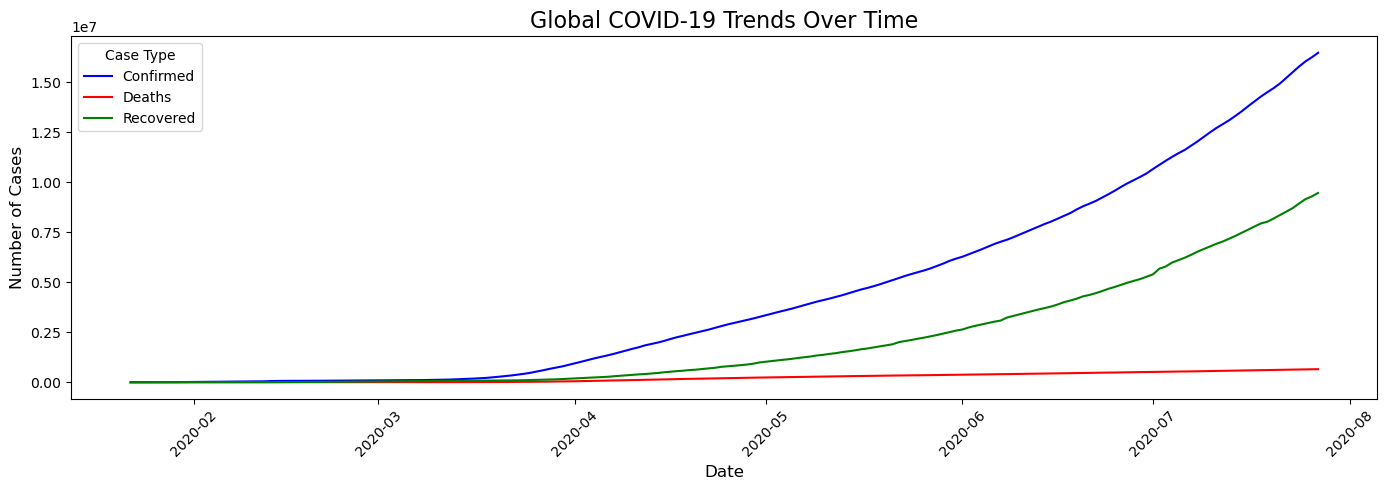

In [18]:
#on global trends
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index() # Group data by date for global trends
plt.figure(figsize=(14, 5))
sns.lineplot(data=global_trends, x='Date', y='Confirmed', label='Confirmed', color='blue')
sns.lineplot(data=global_trends, x='Date', y='Deaths', label='Deaths', color='red')
sns.lineplot(data=global_trends, x='Date', y='Recovered', label='Recovered', color='green')
plt.title('Global COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Case Type', fontsize=10)
plt.tight_layout()
plt.show()

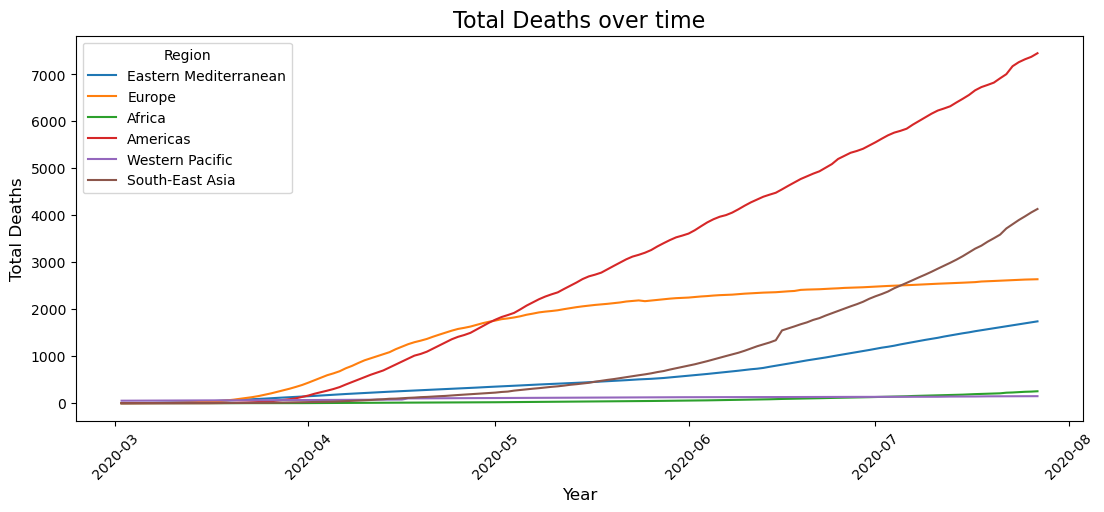

In [19]:
plt.figure(figsize=(13, 5))
new_date=df[df['Date']>'2020-03']
sns.lineplot(data=new_date, x='Date', y='Deaths', hue='WHO Region',errorbar=None)
plt.title('Total Deaths over time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left')
plt.show()
import warnings
warnings.filterwarnings("ignore")

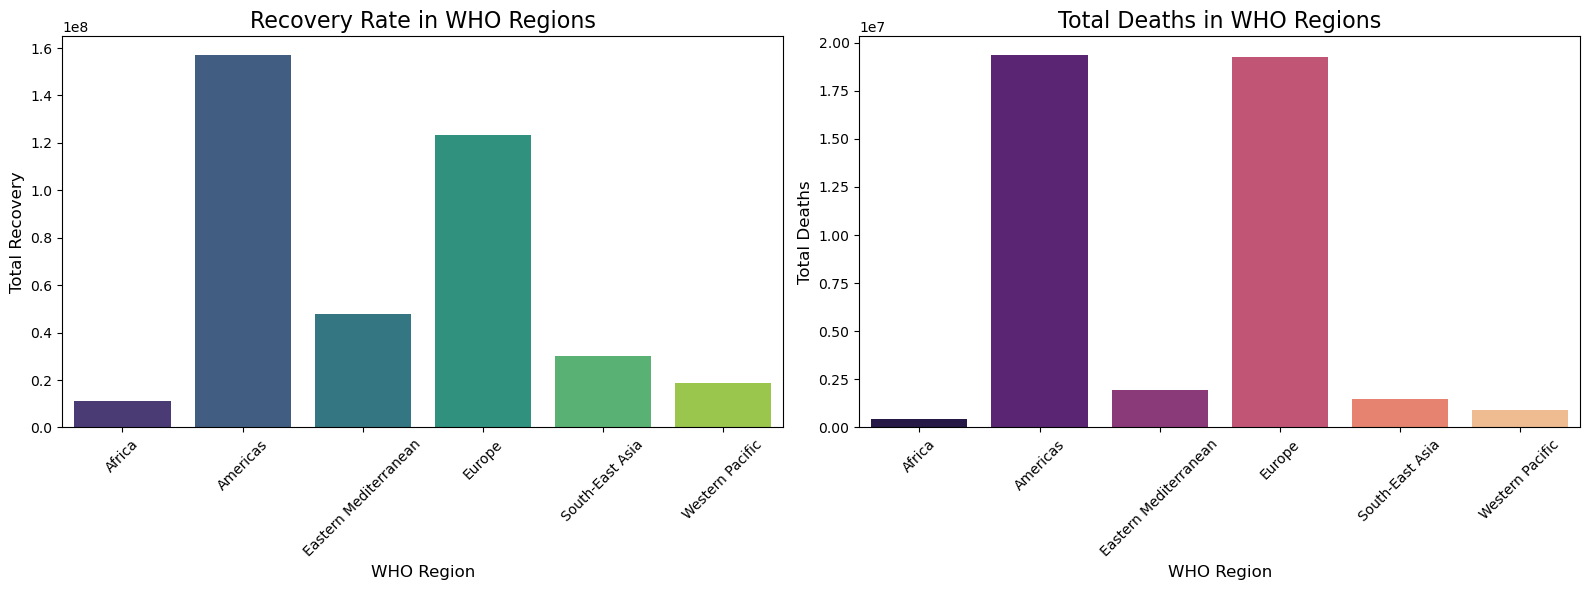

In [20]:
grouped_data = df.groupby('WHO Region')[['Recovered', 'Deaths']].sum().reset_index() # Group data by WHO Region and calculate the total for Recovered and Deaths
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust size as needed
sns.barplot(ax=axes[0], x='WHO Region', y='Recovered', data=grouped_data, palette='viridis')# Subplot 1: Recovery Rate by WHO Region
axes[0].set_title('Recovery Rate in WHO Regions', fontsize=16)
axes[0].set_xlabel('WHO Region', fontsize=12)
axes[0].set_ylabel('Total Recovery', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(ax=axes[1], x='WHO Region', y='Deaths', data=grouped_data, palette='magma')# Subplot 2: Total Deaths by WHO Region
axes[1].set_title('Total Deaths in WHO Regions', fontsize=16)
axes[1].set_xlabel('WHO Region', fontsize=12)
axes[1].set_ylabel('Total Deaths', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# forcasting

## making a forcasting model in india for 1 month


#### Black Points: Represent actual daily death data for the US.
#### Blue Line: Represents predicted daily deaths for the forecasted period.
#### Shaded Blue Area: Represents the confidence interval for the prediction.

21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing


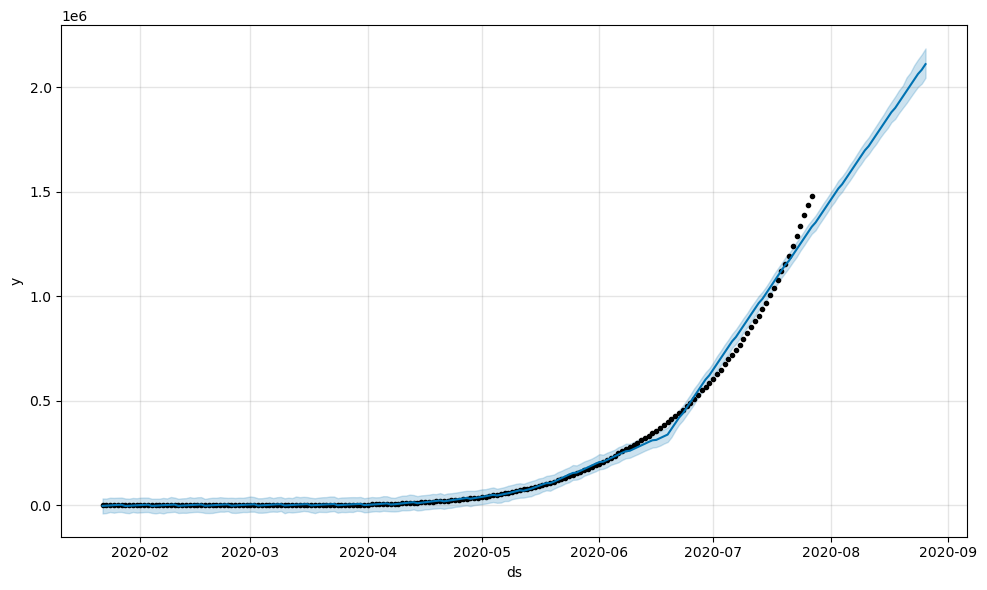

In [21]:
# Prepare data for prediction using Prophet
prophet_data = india_data[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Predict for the next 7 days
forecast = model.predict(future)

# Visualize the forecast
fig_forecast = model.plot(forecast)

## making a model in forcast us data for 1 month

21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing


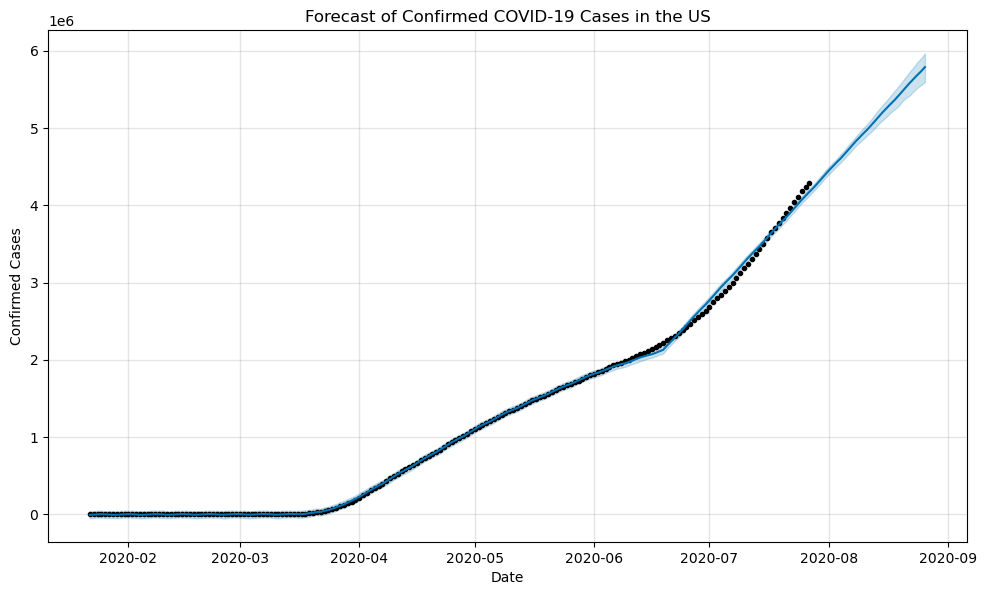

In [22]:
covid_data=df
covid_data = covid_data.rename(columns={'Date': 'ds', 'Confirmed': 'y'})
covid_data['ds'] = pd.to_datetime(covid_data['ds'])
us_data = covid_data[covid_data['Country/Region'] == 'US'][['ds', 'y']]
us_data = us_data.groupby('ds').sum().reset_index()
model = Prophet()
model.fit(us_data)  # Fit the model
future = model.make_future_dataframe(periods=30) #forecasting for 2 months
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Forecast of Confirmed COVID-19 Cases in the US')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

## forcasting death in india for next one month

---



21:16:33 - cmdstanpy - INFO - Chain [1] start processing
21:16:33 - cmdstanpy - INFO - Chain [1] done processing


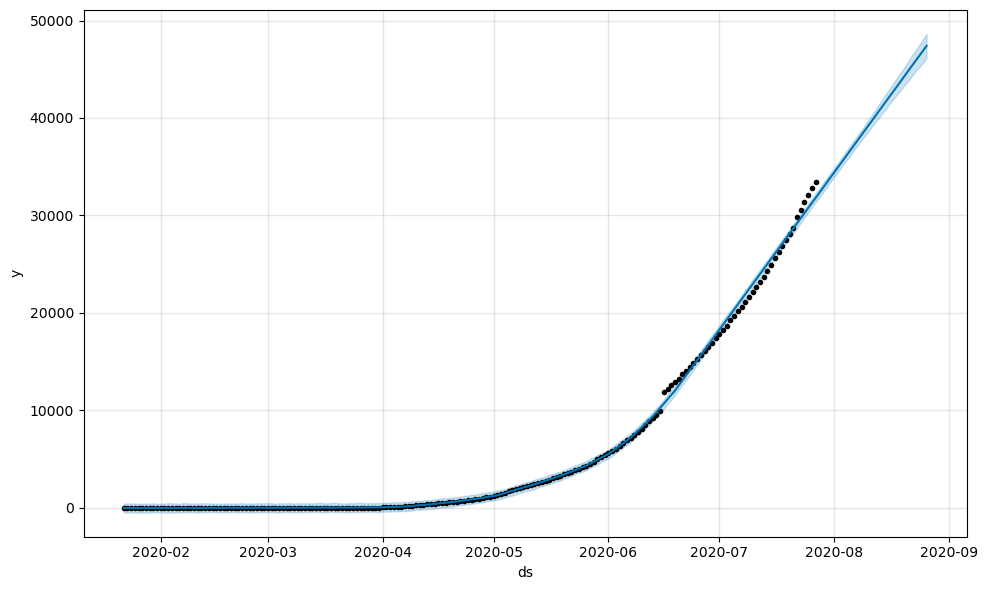

In [23]:
# Prepare data for prediction using Prophet
prophet_data = india_data[['Date', 'Deaths']].rename(columns={'Date': 'ds', 'Deaths': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Predict for the next 7 days
forecast = model.predict(future)

# Visualize the forecast
fig_forecast = model.plot(forecast)